**Autor**: *Gustavo Alcántara Aravena*

▪**Programa:** *Diplomado Data Science, Machine Learning, Inteligencia Artificial, Deep Learning (versión 22)*

▪**Universidad:** *Pontificia Universidad Católica de Valparaíso*

✍ *Se abordó el problema de fuga de clientes (churn) en una empresa de telecomunicaciones, utilizando técnicas de ML. Se realizó un análisis exploratorio, se evaluaron posibles datos faltantes o atípicos, y se implementaron modelos de clasificación. Finalmente, se evaluó el desempeño de los modelos mediante métricas como accuracy y ROC para identificar el modelo más efectivo para anticipar la fuga de clientes.*

# Conexión a Google Drive - Lectura *dataset 'churn-analysis.csv'*.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
ruta = '/content/drive/MyDrive/Modelo_de_Clasificación_Diplomado_IA_(versión_22)_Gustavo_Alcántara/churn-analysis.csv'
df = pd.read_csv(ruta, sep=';')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,state,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


#Análisis Exploratorio

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   area code               3333 non-null   int64  
 2   phone number            3333 non-null   object 
 3   international plan      3333 non-null   object 
 4   voice mail plan         3333 non-null   object 
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total day charge        3333 non-null   float64
 9   total eve minutes       3333 non-null   float64
 10  total eve calls         3333 non-null   int64  
 11  total eve charge        3333 non-null   float64
 12  total night minutes     3333 non-null   float64
 13  total night calls       3333 non-null   int64  
 14  total night charge      3333 non-null   

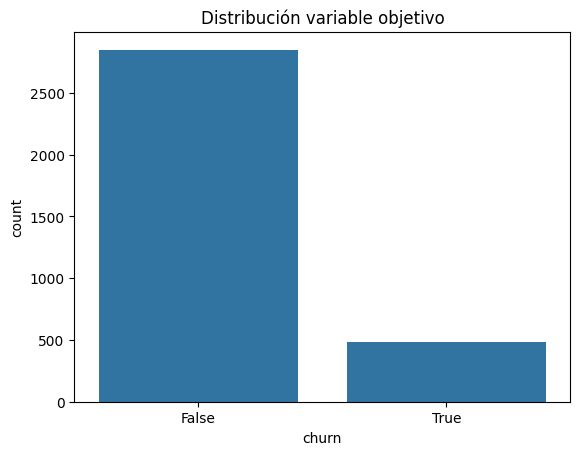

churn
False    85.508551
True     14.491449
Name: proportion, dtype: float64
Index(['state', 'area code', 'phone number', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn'],
      dtype='object')


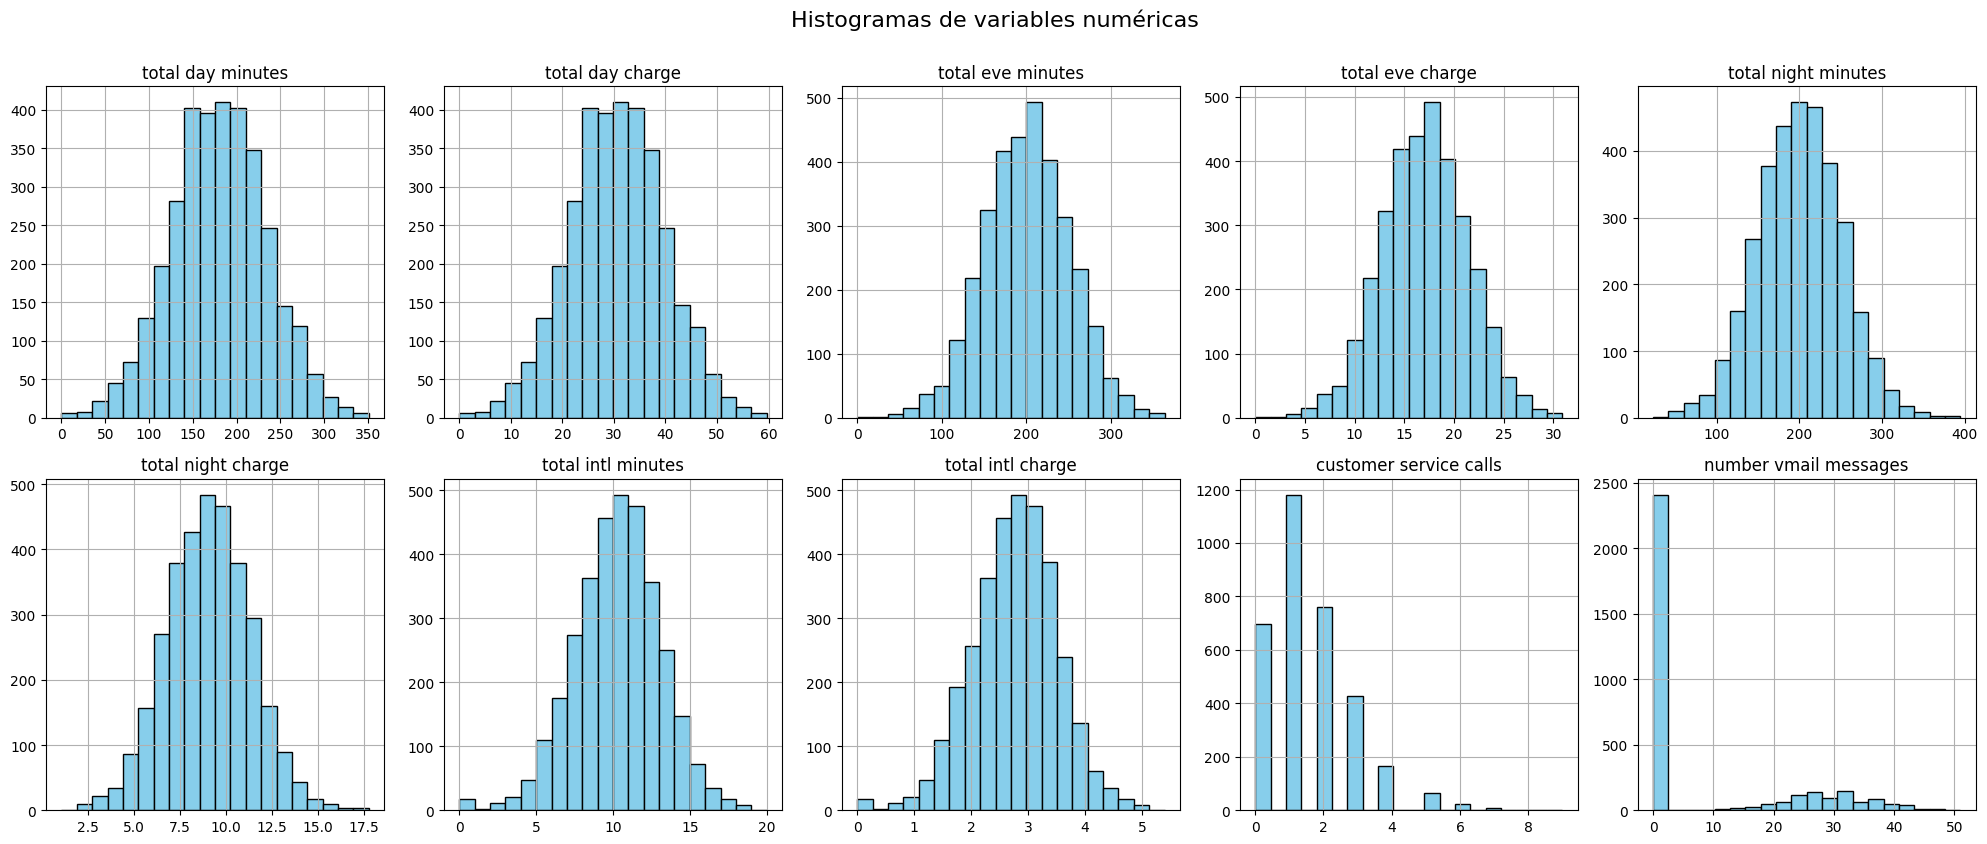

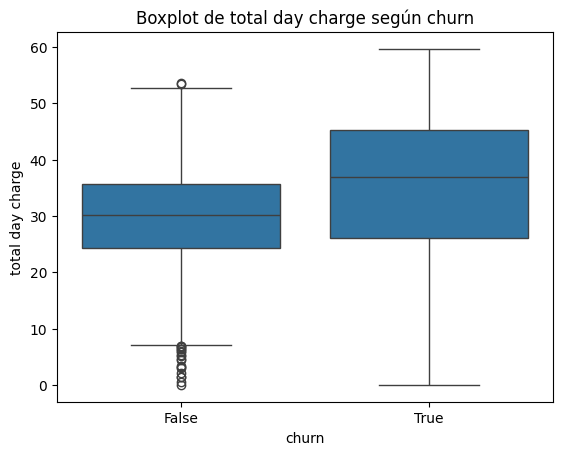

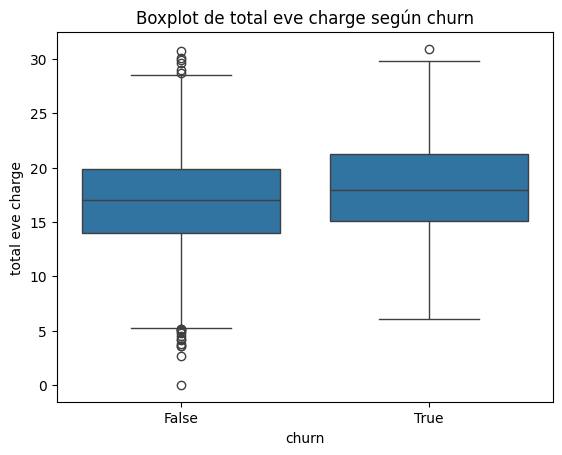

In [ ]:
df.info()
df.describe(include='all').T

#Distribución de la variable objetivo
import seaborn as sns, matplotlib.pyplot as plt
sns.countplot(x='churn', data=df)
plt.title('Distribución variable objetivo')
plt.show()

porc = df['churn'].value_counts(normalize=True)*100
print(porc)

#La clase “True” representa solo X % ⇒ dataset levemente/muy desbalanceado.
print(df.columns)

# Selecciona las variables numéricas relevantes
num_cols = [
    'total day minutes', 'total day charge',
    'total eve minutes', 'total eve charge',
    'total night minutes', 'total night charge',
    'total intl minutes', 'total intl charge',
    'customer service calls', 'number vmail messages'
]

# Generar histogramas
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()
for i, col in enumerate(num_cols):
    df[col].hist(bins=20, ax=axes[i], color='skyblue', edgecolor='black')
    axes[i].set_title(col)
plt.tight_layout()
plt.suptitle('Histogramas de variables numéricas', fontsize=16, y=1.05)
plt.show()

sns.boxplot(x='churn', y='total day charge', data=df)
plt.title('Boxplot de total day charge según churn')
plt.show()

sns.boxplot(x='churn', y='total eve charge', data=df)
plt.title('Boxplot de total eve charge según churn')
plt.show()

#Tablas de contingencia

Tabla de contingencia: International Plan vs Churn
churn                  False      True
international plan                    
no                  0.885050  0.114950
yes                 0.575851  0.424149
All                 0.855086  0.144914 

Tabla de contingencia: Voice Mail Plan vs Churn
churn               False      True
voice mail plan                    
no               0.832849  0.167151
yes              0.913232  0.086768
All              0.855086  0.144914 

Tabla de contingencia: State vs Churn
churn     False      True
state                    
AK     0.942308  0.057692
AL     0.900000  0.100000
AR     0.800000  0.200000
AZ     0.937500  0.062500
CA     0.735294  0.264706
CO     0.863636  0.136364
CT     0.837838  0.162162
DC     0.907407  0.092593
DE     0.852459  0.147541
FL     0.873016  0.126984
GA     0.851852  0.148148
HI     0.943396  0.056604
IA     0.931818  0.068182
ID     0.876712  0.123288
IL     0.913793  0.086207
IN     0.873239  0.126761
KS     0.814286 

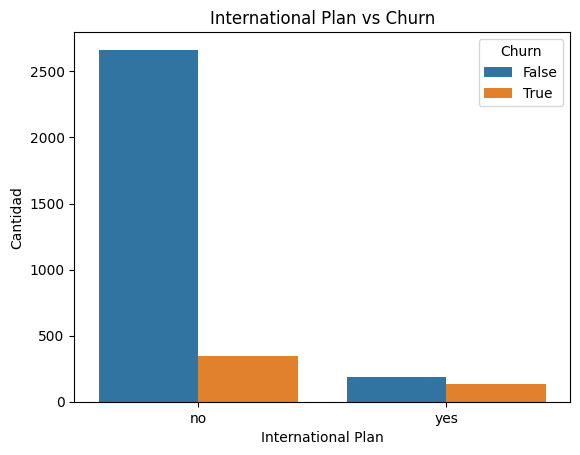

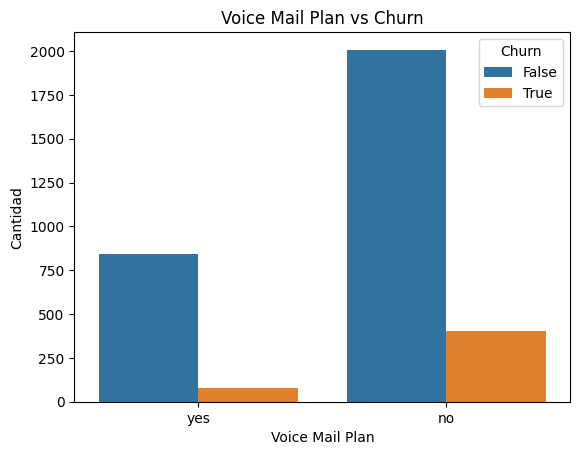

In [ ]:
#Tabla de contingencia: international plan vs churn
tabla_international = pd.crosstab(df['international plan'], df['churn'], margins=True, normalize='index')
print("Tabla de contingencia: International Plan vs Churn")
print(tabla_international, "\n")

#Tabla de contingencia: voice mail plan vs churn
tabla_voicemail = pd.crosstab(df['voice mail plan'], df['churn'], margins=True, normalize='index')
print("Tabla de contingencia: Voice Mail Plan vs Churn")
print(tabla_voicemail, "\n")

#Tabla de contingencia: state vs churn
tabla_state = pd.crosstab(df['state'], df['churn'], margins=True, normalize='index')
print("Tabla de contingencia: State vs Churn")
print(tabla_state, "\n")

#Tabla de contingencia: area code vs churn
tabla_area = pd.crosstab(df['area code'], df['churn'], margins=True, normalize='index')
print("Tabla de contingencia: Area Code vs Churn")
print(tabla_area, "\n")

#Agrupar customer service calls en categorías
df['customer_service_cat'] = pd.cut(df['customer service calls'],
                                    bins=[-1, 1, 3, df['customer service calls'].max()],
                                    labels=['0-1', '2-3', '4 o más'])

#Tabla de contingencia: customer service calls (agrupado) vs churn
tabla_csc = pd.crosstab(df['customer_service_cat'], df['churn'], margins=True, normalize='index')
print("Tabla de contingencia: Customer Service Calls (agrupado) vs Churn")
print(tabla_csc, "\n")

##############Variables categóricas vs churn#######################
#Columna categórica 'international plan', Gráfico de 'international plan' vs 'churn'
sns.countplot(x='international plan', hue='churn', data=df)
plt.title('International Plan vs Churn')
plt.xlabel('International Plan')
plt.ylabel('Cantidad')
plt.legend(title='Churn')
plt.show()

#Columna categórica 'voice mail plan'], Gráfico de 'voice mail plan' vs 'churn'
sns.countplot(x='voice mail plan', hue='churn', data=df)
plt.title('Voice Mail Plan vs Churn')
plt.xlabel('Voice Mail Plan')
plt.ylabel('Cantidad')
plt.legend(title='Churn')
plt.show()

#Valores faltantes y outliers

Series([], dtype: int64)
state                     0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
customer_service_cat      0
dtype: int64
total day charge: 25 outliers
total eve charge: 24 outliers
total night charge: 30 outliers
total intl charge: 49 outliers
customer service calls: 267 outliers
number vmail messages: 1 outliers


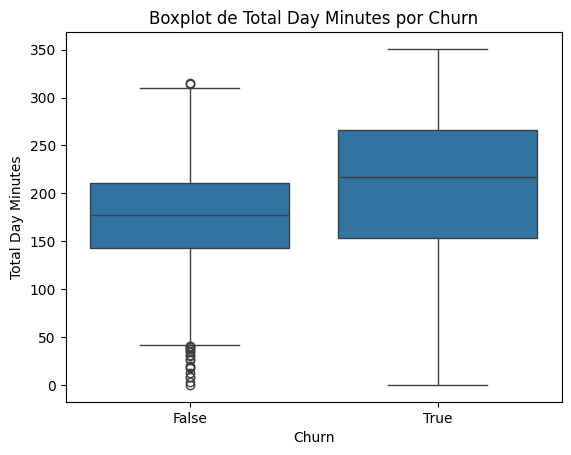

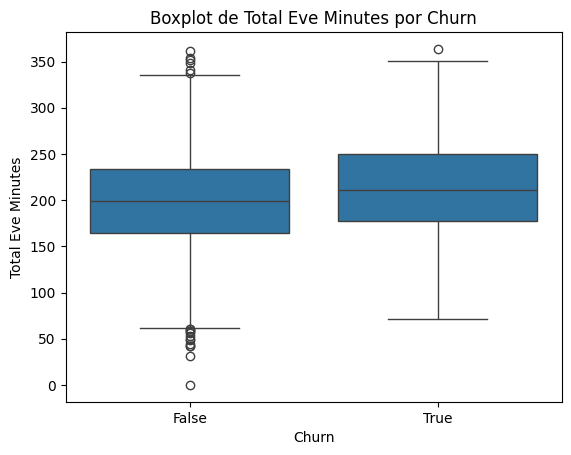

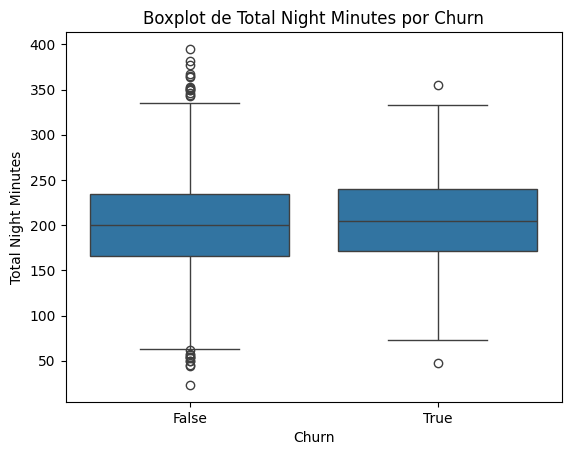

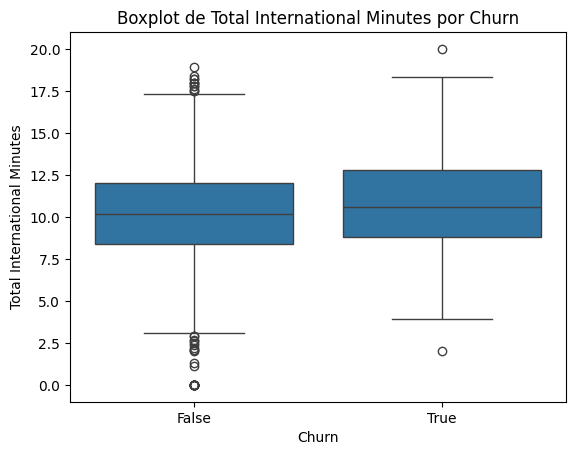

In [ ]:
#Evaluación de datos faltantes y atípicos. Verificación de valores faltantes.
faltantes = df.isnull().sum()
print(faltantes[faltantes > 0])

# Revisar si hay valores faltantes en el dataset con otro método, es más estético presentarlo de esta manera (ayuda memoria)
print(df.isnull().sum())

import numpy as np

# Selecciona las variables numéricas relevantes
num_cols = [
    'total day charge', 'total eve charge',
    'total night charge', 'total intl charge',
    'customer service calls', 'number vmail messages'
]

# Detección de outliers usando el rango intercuartílico (IQR)
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    print(f"{col}: {len(outliers)} outliers")

#Boxplot de total day minutes por Churn
sns.boxplot(x='churn', y='total day minutes', data=df)
plt.title('Boxplot de Total Day Minutes por Churn')
plt.xlabel('Churn')
plt.ylabel('Total Day Minutes')
plt.show()

#Boxplot de total eve minutes por Churn
sns.boxplot(x='churn', y='total eve minutes', data=df)
plt.title('Boxplot de Total Eve Minutes por Churn')
plt.xlabel('Churn')
plt.ylabel('Total Eve Minutes')
plt.show()

#Boxplot de total night minutes por Churn
sns.boxplot(x='churn', y='total night minutes', data=df)
plt.title('Boxplot de Total Night Minutes por Churn')
plt.xlabel('Churn')
plt.ylabel('Total Night Minutes')
plt.show()

#Boxplot de total intl minutes por Churn
sns.boxplot(x='churn', y='total intl minutes', data=df)
plt.title('Boxplot de Total International Minutes por Churn')
plt.xlabel('Churn')
plt.ylabel('Total International Minutes')
plt.show()

# Preprocesamiento de los datos

In [ ]:
# Aplicar mapeo
df['international plan'] = df['international plan'].map({'yes': 1, 'no': 0})
df['voice mail plan'] = df['voice mail plan'].map({'yes': 1, 'no': 0})

In [ ]:
print(df[['international plan', 'voice mail plan']].isnull().sum())
print(df[['international plan', 'voice mail plan']].head())

international plan    0
voice mail plan       0
dtype: int64
   international plan  voice mail plan
0                   0                1
1                   0                1
2                   0                0
3                   1                0
4                   1                0


In [ ]:
# Verificación inicial de los valores de churn
print("Valores únicos en 'churn':", df['churn'].unique())
print("Primeros valores:\n", df['churn'].head())

# Codificar international plan y voice mail plan solo si es necesario
if df['international plan'].dtype == object:
    df['international plan'] = df['international plan'].map({'yes': 1, 'no': 0})

if df['voice mail plan'].dtype == object:
    df['voice mail plan'] = df['voice mail plan'].map({'yes': 1, 'no': 0})

# Codificar churn solo si es tipo booleano
if df['churn'].dtype == bool:
    df['churn'] = df['churn'].astype(int)

# Verificación post-codificación
print("Valores únicos en 'churn' después de codificar:")
print(df['churn'].value_counts(dropna=False))

# Eliminar columnas irrelevantes
df = df.drop(columns=['state', 'area code', 'phone number'], errors='ignore')

# Verificar y mostrar valores faltantes
print("\nValores NaN por columna antes de limpiar:")
print(df.isnull().sum())

# Eliminar filas con NaN en churn (por seguridad)
df = df.dropna(subset=['churn'])

# Confirmación final
print("\nDespués de limpiar:")
print(df.isnull().sum())
print("Forma final del DataFrame:", df.shape)
print("Distribución de 'churn':")
print(df['churn'].value_counts())

Valores únicos en 'churn': [False  True]
Primeros valores:
 0    False
1    False
2    False
3    False
4    False
Name: churn, dtype: bool
Valores únicos en 'churn' después de codificar:
churn
0    2850
1     483
Name: count, dtype: int64

Valores NaN por columna antes de limpiar:
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
customer_service_cat      0
dtype: int64

Después de limpiar:
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve m

#Implementación de modelos de clasificación

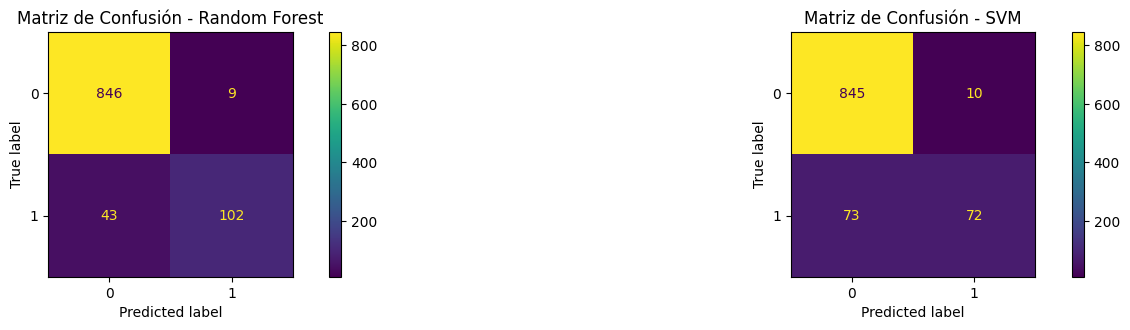

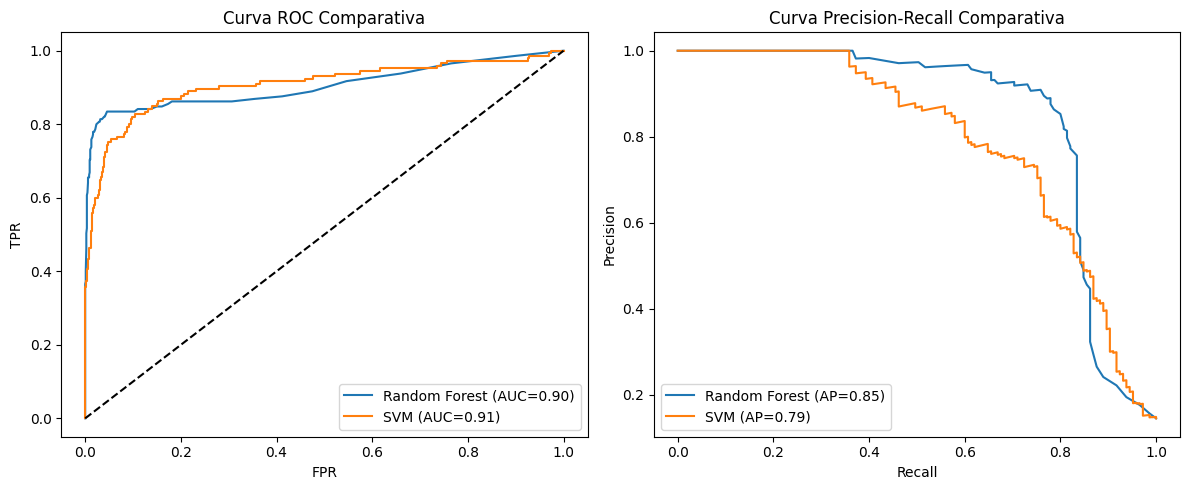

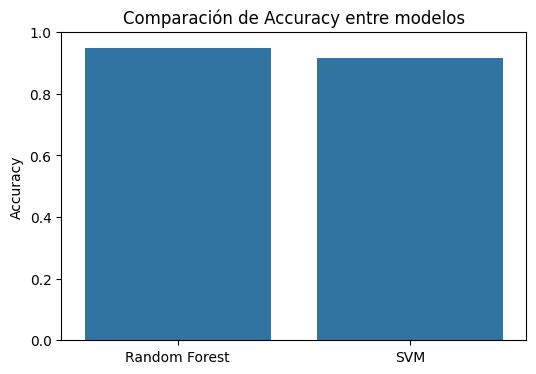

Reporte clasificación - Random Forest:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       855
           1       0.92      0.70      0.80       145

    accuracy                           0.95      1000
   macro avg       0.94      0.85      0.88      1000
weighted avg       0.95      0.95      0.95      1000

Reporte clasificación - SVM:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95       855
           1       0.88      0.50      0.63       145

    accuracy                           0.92      1000
   macro avg       0.90      0.74      0.79      1000
weighted avg       0.91      0.92      0.91      1000



,0
0,1.000214
1,1.000214
2,1.000214
3,1.000214
4,1.000214
5,1.000214
6,1.000214
7,1.000214
8,1.000214
9,1.000214


In [ ]:
#Implementación N°1
# Modelado: Random Forest y SVM (ambos sin SMOTE)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (confusion_matrix, classification_report,
                             roc_curve, auc, precision_recall_curve,
                             average_precision_score, ConfusionMatrixDisplay)

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Separación de variables
X = df.drop(columns=['churn', 'customer_service_cat'])  # excluye texto
y = df['churn']

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Escalar variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenamiento de modelos
rf = RandomForestClassifier(random_state=42)
svm = SVC(probability=True, random_state=42)

rf.fit(X_train_scaled, y_train)
svm.fit(X_train_scaled, y_train)

# Evaluación y visualización
modelos = {'Random Forest': rf, 'SVM': svm}
resultados = {}

plt.figure(figsize=(15, 6))
for i, (nombre, modelo) in enumerate(modelos.items()):
    y_pred = modelo.predict(X_test_scaled)
    y_proba = modelo.predict_proba(X_test_scaled)[:, 1]

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    plt.subplot(2, 2, i+1)
    disp.plot(ax=plt.gca())
    plt.title(f'Matriz de Confusión - {nombre}')

    # Métricas
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    auc_roc = auc(fpr, tpr)
    auc_pr = average_precision_score(y_test, y_proba)

    resultados[nombre] = {
        'modelo': modelo,
        'fpr': fpr,
        'tpr': tpr,
        'precision': precision,
        'recall': recall,
        'auc_roc': auc_roc,
        'auc_pr': auc_pr,
        'accuracy': modelo.score(X_test_scaled, y_test)
    }

plt.tight_layout()
plt.show()

# Superposición de curvas ROC y PR
plt.figure(figsize=(12, 5))

# ROC
plt.subplot(1, 2, 1)
for nombre, res in resultados.items():
    plt.plot(res['fpr'], res['tpr'], label=f"{nombre} (AUC={res['auc_roc']:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Curva ROC Comparativa")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()

# Precision-Recall
plt.subplot(1, 2, 2)
for nombre, res in resultados.items():
    plt.plot(res['recall'], res['precision'], label=f"{nombre} (AP={res['auc_pr']:.2f})")
plt.title("Curva Precision-Recall Comparativa")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()

plt.tight_layout()
plt.show()

# Gráfico de Accuracy
plt.figure(figsize=(6, 4))
sns.barplot(x=list(resultados.keys()), y=[res['accuracy'] for res in resultados.values()])
plt.title("Comparación de Accuracy entre modelos")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

print("Reporte clasificación - Random Forest:\n", classification_report(y_test, rf.predict(X_test_scaled)))
print("Reporte clasificación - SVM:\n", classification_report(y_test, svm.predict(X_test_scaled)))

# Comparar antes y después del escalamiento
pd.DataFrame(X_train).describe()
pd.DataFrame(X_train_scaled).mean(axis=0)   # ≈ 0
pd.DataFrame(X_train_scaled).std(axis=0)    # ≈ 1

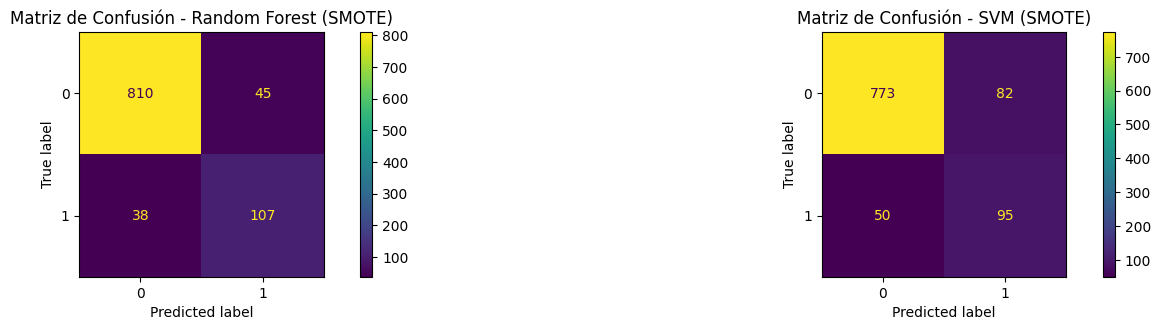

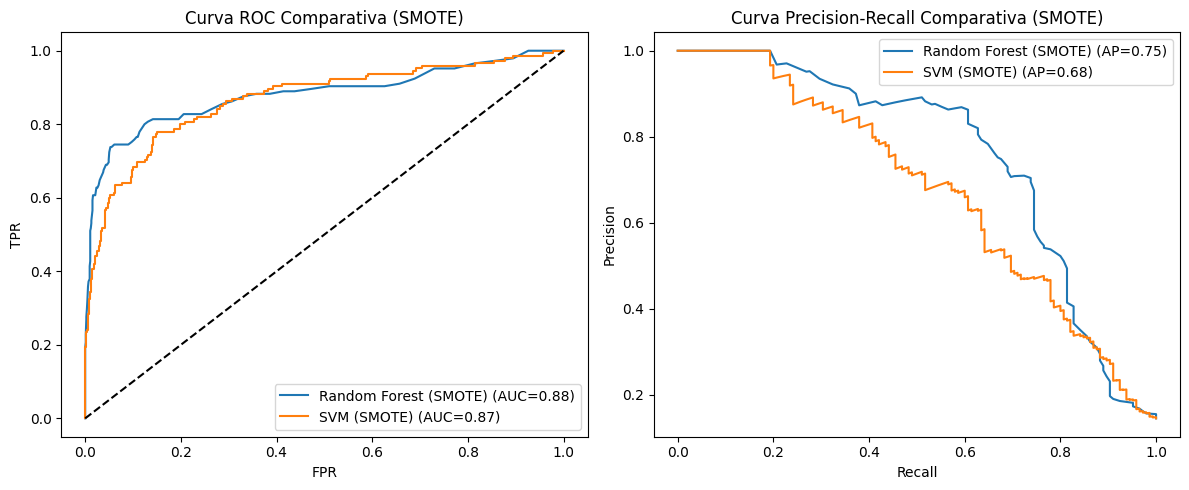

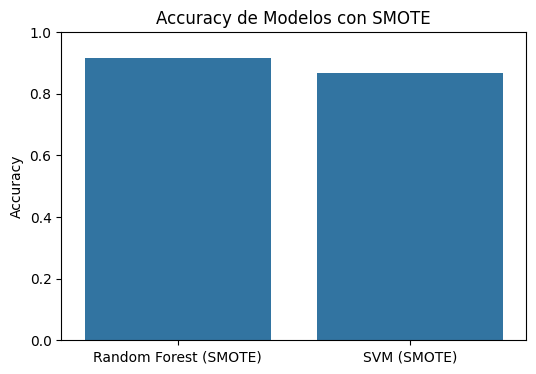

Reporte clasificación - Random Forest (SMOTE):
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       855
           1       0.70      0.74      0.72       145

    accuracy                           0.92      1000
   macro avg       0.83      0.84      0.84      1000
weighted avg       0.92      0.92      0.92      1000

Reporte clasificación - SVM (SMOTE):
               precision    recall  f1-score   support

           0       0.94      0.90      0.92       855
           1       0.54      0.66      0.59       145

    accuracy                           0.87      1000
   macro avg       0.74      0.78      0.76      1000
weighted avg       0.88      0.87      0.87      1000



In [ ]:
#Implementación N°2
# Modelado con SMOTE: Random Forest y SVM
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (confusion_matrix, classification_report,
                             roc_curve, auc, precision_recall_curve,
                             average_precision_score, ConfusionMatrixDisplay)

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Separación de variables
X = df.drop(columns=['churn', 'customer_service_cat'])
y = df['churn']

# División en entrenamiento y prueba (antes de SMOTE)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# Aplicar SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Escalamiento (se aplica después de SMOTE)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Entrenamiento de modelos
rf = RandomForestClassifier(random_state=42)
svm = SVC(probability=True, random_state=42)

rf.fit(X_train_scaled, y_train_resampled)
svm.fit(X_train_scaled, y_train_resampled)

# Evaluación y visualización
modelos = {'Random Forest (SMOTE)': rf, 'SVM (SMOTE)': svm}
resultados = {}

plt.figure(figsize=(15, 6))
for i, (nombre, modelo) in enumerate(modelos.items()):
    y_pred = modelo.predict(X_test_scaled)
    y_proba = modelo.predict_proba(X_test_scaled)[:, 1]

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    plt.subplot(2, 2, i+1)
    disp.plot(ax=plt.gca())
    plt.title(f'Matriz de Confusión - {nombre}')

    # Métricas
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    auc_roc = auc(fpr, tpr)
    auc_pr = average_precision_score(y_test, y_proba)

    resultados[nombre] = {
        'modelo': modelo,
        'fpr': fpr,
        'tpr': tpr,
        'precision': precision,
        'recall': recall,
        'auc_roc': auc_roc,
        'auc_pr': auc_pr,
        'accuracy': modelo.score(X_test_scaled, y_test)
    }

plt.tight_layout()
plt.show()

# Superposición de curvas ROC y PR
plt.figure(figsize=(12, 5))

# ROC
plt.subplot(1, 2, 1)
for nombre, res in resultados.items():
    plt.plot(res['fpr'], res['tpr'], label=f"{nombre} (AUC={res['auc_roc']:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Curva ROC Comparativa (SMOTE)")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()

# Precision-Recall
plt.subplot(1, 2, 2)
for nombre, res in resultados.items():
    plt.plot(res['recall'], res['precision'], label=f"{nombre} (AP={res['auc_pr']:.2f})")
plt.title("Curva Precision-Recall Comparativa (SMOTE)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()

plt.tight_layout()
plt.show()

# Gráfico de Accuracy
plt.figure(figsize=(6, 4))
sns.barplot(x=list(resultados.keys()), y=[res['accuracy'] for res in resultados.values()])
plt.title("Accuracy de Modelos con SMOTE")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

# Reporte clasificación
print("Reporte clasificación - Random Forest (SMOTE):\n", classification_report(y_test, rf.predict(X_test_scaled)))
print("Reporte clasificación - SVM (SMOTE):\n", classification_report(y_test, svm.predict(X_test_scaled)))

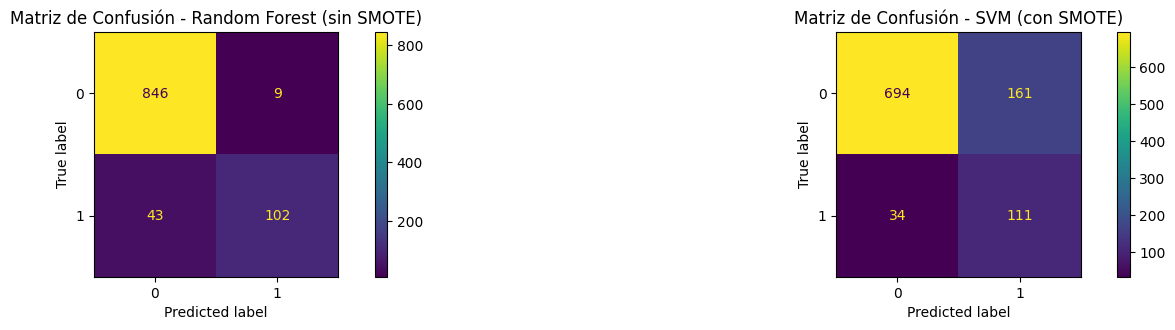

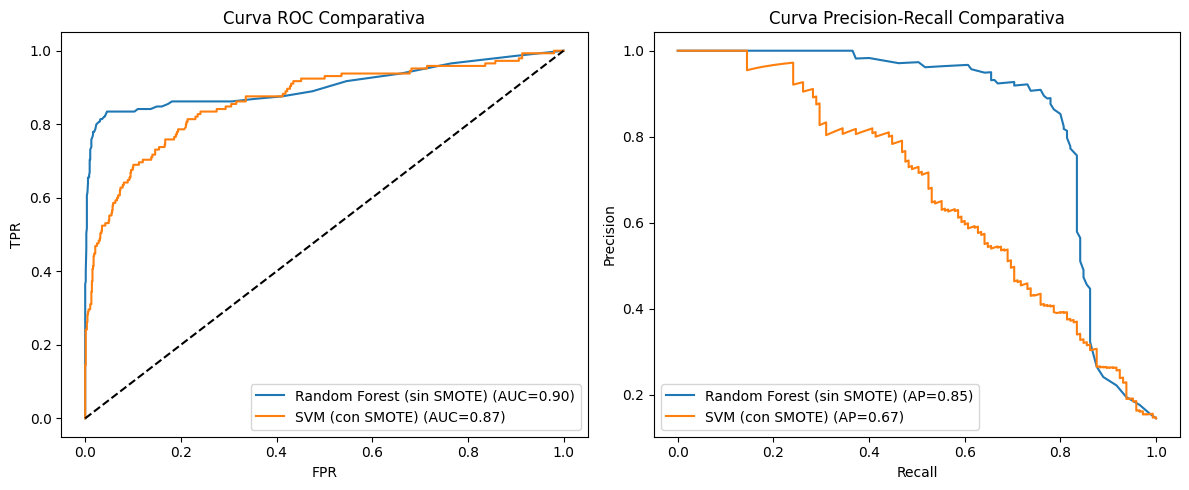

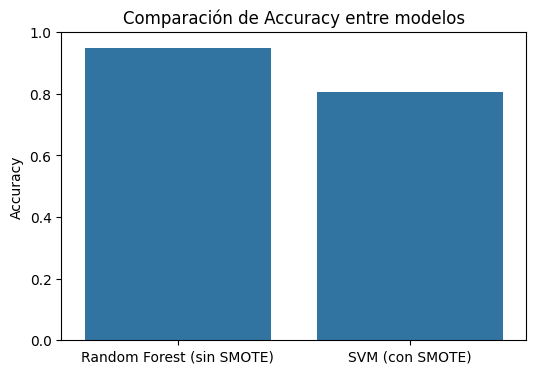

Reporte clasificación - Random Forest (sin SMOTE):
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       855
           1       0.92      0.70      0.80       145

    accuracy                           0.95      1000
   macro avg       0.94      0.85      0.88      1000
weighted avg       0.95      0.95      0.95      1000

Reporte clasificación - SVM (con SMOTE):
               precision    recall  f1-score   support

           0       0.95      0.81      0.88       855
           1       0.41      0.77      0.53       145

    accuracy                           0.81      1000
   macro avg       0.68      0.79      0.70      1000
weighted avg       0.87      0.81      0.83      1000



In [ ]:
#Implementación N°3
# Modelado: RF sin SMOTE / SVM con SMOTE

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (confusion_matrix, classification_report,
                             roc_curve, auc, precision_recall_curve,
                             average_precision_score, ConfusionMatrixDisplay)

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Separación de variables

X = df.drop(columns=['churn', 'customer_service_cat'])
y = df['churn']

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)


# SMOTE solo para SVM
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


# Escalamiento (solo a variables numéricas)
scaler = StandardScaler()

# Para Random Forest (sin SMOTE)
X_train_scaled_rf = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Para SVM (con SMOTE)
X_train_scaled_svm = scaler.fit_transform(X_train_smote)

# Entrenamiento de modelos
rf = RandomForestClassifier(random_state=42)
svm = SVC(probability=True, random_state=42)

rf.fit(X_train_scaled_rf, y_train)           # Sin SMOTE
svm.fit(X_train_scaled_svm, y_train_smote)   # Con SMOTE

# Evaluación y visualización
modelos = {
    'Random Forest (sin SMOTE)': rf,
    'SVM (con SMOTE)': svm
}
resultados = {}

plt.figure(figsize=(15, 6))
for i, (nombre, modelo) in enumerate(modelos.items()):
    y_pred = modelo.predict(X_test_scaled)
    y_proba = modelo.predict_proba(X_test_scaled)[:, 1]

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    plt.subplot(2, 2, i+1)
    disp.plot(ax=plt.gca())
    plt.title(f'Matriz de Confusión - {nombre}')

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    auc_roc = auc(fpr, tpr)
    auc_pr = average_precision_score(y_test, y_proba)

    resultados[nombre] = {
        'modelo': modelo,
        'fpr': fpr,
        'tpr': tpr,
        'precision': precision,
        'recall': recall,
        'auc_roc': auc_roc,
        'auc_pr': auc_pr,
        'accuracy': modelo.score(X_test_scaled, y_test)
    }

plt.tight_layout()
plt.show()

# Superposición de curvas ROC y PR
plt.figure(figsize=(12, 5))

# ROC
plt.subplot(1, 2, 1)
for nombre, res in resultados.items():
    plt.plot(res['fpr'], res['tpr'], label=f"{nombre} (AUC={res['auc_roc']:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Curva ROC Comparativa")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()

# PR
plt.subplot(1, 2, 2)
for nombre, res in resultados.items():
    plt.plot(res['recall'], res['precision'], label=f"{nombre} (AP={res['auc_pr']:.2f})")
plt.title("Curva Precision-Recall Comparativa")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()

plt.tight_layout()
plt.show()

# Gráfico de barras de Accuracy
plt.figure(figsize=(6, 4))
sns.barplot(x=list(resultados.keys()), y=[res['accuracy'] for res in resultados.values()])
plt.title("Comparación de Accuracy entre modelos")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

# Reportes de clasificación
print("Reporte clasificación - Random Forest (sin SMOTE):\n", classification_report(y_test, rf.predict(X_test_scaled)))
print("Reporte clasificación - SVM (con SMOTE):\n", classification_report(y_test, svm.predict(X_test_scaled)))
